<a href="https://colab.research.google.com/github/rhdmsggg/Colab_machine_learning/blob/main/07_3_%EC%8B%A0%EA%B2%BD%EB%A7%9D_%EB%AA%A8%EB%8D%B8_%ED%9B%88%EB%A0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 신경망 모델 훈련

## 손실 곡선

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) =\
keras.datasets.fashion_mnist.load_data()
train_scaled = train_input /255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

4431872/4422102 [==============================] - 0s 0us/step


In [2]:
def model_fn(a_layer=None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28,28)))
  model.add(keras.layers.Dense(100,activation='relu'))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation='softmax'))
  return model

In [3]:
model = model_fn()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

In [5]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


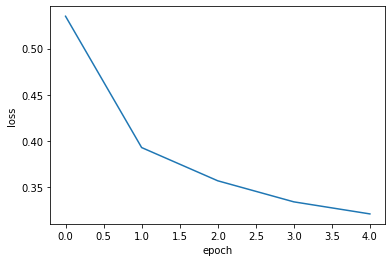

In [6]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

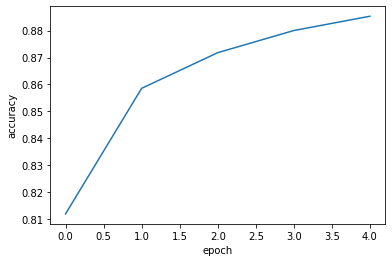

In [7]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

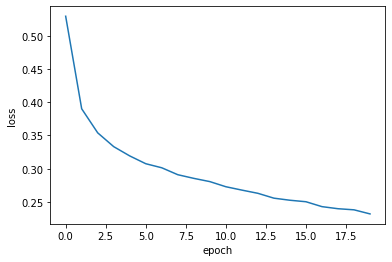

In [8]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 검증 손실

In [9]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

In [10]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


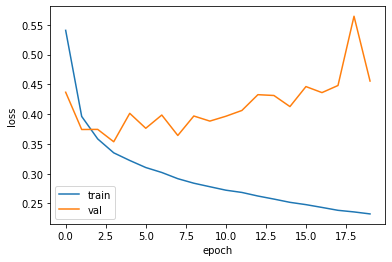

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

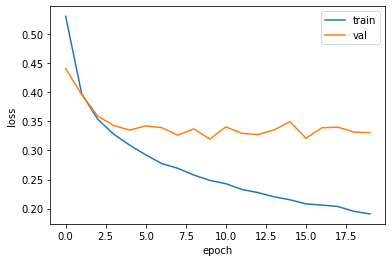

In [12]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, 
                    validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

## 드롭 아웃

In [13]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               78500     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


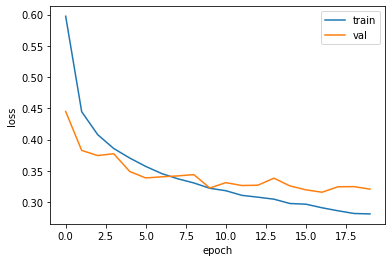

In [14]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics= 'accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 모델 저장과 복원

In [15]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

In [15]:
history = model.fit(train_scaled, train_target, epochs=10, verbose=0,
                    validation_data=(val_scaled, val_target))

In [16]:
# 모든 층의 가중치와 절편을 파일에 저장한다
model.save_weights('model-weights.h5')

In [17]:
model.save('model-whole.h5')

In [18]:
!ls -al *.h5

-rw-r--r-- 1 root root 332480 Sep 14 02:05 model-weights.h5
-rw-r--r-- 1 root root 333896 Sep 14 02:05 model-whole.h5


In [19]:
model = model_fn(keras.layers.Dropout(0.3))

In [20]:
# 모든 층의 가중치와 절편을 파일에 읽는다
model.load_weights('model-weights.h5')

In [21]:
import numpy as np

def accuracy_fn(model, x, y):
  # argmax = 배열에서 축을 따라 최대값의 인덱스를 반환
  labels = np.argmax(model.predict(x), axis=-1)
  return np.mean(labels == y)

In [22]:
accuracy_fn(model, val_scaled, val_target)

0.10291666666666667

In [23]:
model = keras.models.load_model('model-whole.h5')

In [24]:
# accuracy_fn(model, var_scaled, val_target)

model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 2.5084 - accuracy: 0.0262


[2.508371353149414, 0.02616666629910469]

## 콜백

In [25]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

In [26]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')

In [27]:
model.fit(train_scaled, train_target, epochs=20, verbose=0,
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])

In [32]:
model = keras.models.load_model('best-model.h5')
# accuracy_fn(model, val_scaled, val_target)
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3168 - accuracy: 0.8897


[0.3167537748813629, 0.8896666765213013]

In [34]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
model.fit(train_scaled, train_target, epochs=20, verbose=0,
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])

In [35]:
# model.save()로 저장된 모델을 로드한다.
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3208 - accuracy: 0.8867


[0.32081177830696106, 0.8866666555404663]

In [36]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')
# 케라스 모델과 가중치를 일정 간격으로 저장
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
# 관심지표가 더이상 향상하지 않으면 훈련을 중지
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

In [38]:
print(early_stopping_cb.stopped_epoch)

10


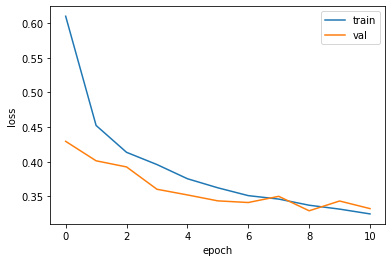

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [40]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 1ms/step - loss: 0.3292 - accuracy: 0.8794


[0.32920145988464355, 0.8794166445732117]

# 마무리



*   **드롭아웃**은 은닉층에 있는 뉴런의 출력을 랜덤하게 껴서 과대적합을 막는 기법이다. 훈련 중에 적용되며 평가나 예측에서는 적용하지 않는다. 텐서플로는 이를 자동으로 처리한다.

*   **콜백**은 케라스 모델을 훈련하는 도중에 어떤 작업을 수행할 수 있도록 도와주는 도구이다. 대표적으로 최상의 모델을 자동으로 저장해주거나 검증 점수가 더 이상 향상되지 않으면 일찍 종료할 수 있다.



*  **조기 종료**는 검증 점수가 더 이상 감소하지 않고 상승하여 과대적합이 일어나면 훈련을 계속 진해앟지 않고 멈추는 기법이다.




